# Set 4. Discriminative Classifiers

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline

## 1

Considere um problema de classes 2D que involve duas classes, para as quais os modelos verdadeiros são distribuições Gaussianas com médias $\mu_0 = \begin{bmatrix}0&0\end{bmatrix}^t$ e $\mu_1 = \begin{bmatrix}3&3\end{bmatrix}^t$, e matrizes de covariância $\Sigma_0=\begin{bmatrix}1.1 & 0.3 \\ 0.3 & 1.9\end{bmatrix}$ e $\Sigma_1=\begin{bmatrix}1.1 & 0.0 \\ 0.0 & 1.9\end{bmatrix}$. Em python:

**a)** Forme e represente graficamente um data set $X$ que consiste em 50 pontos da classe $C_0$ e outros 40 pontos da classe $C_1$.

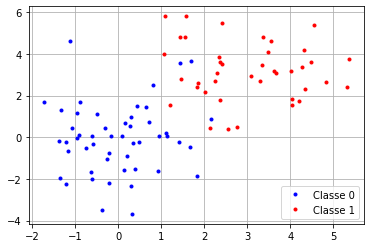

In [ ]:
u_0 = np.array([0,0]).T  # médias
u_1 = np.array([3,3]).T

cov0 = np.array([[1.1,0.3],[0.3,1.9]])    # covariâncias
cov1 = np.array([[1.1,0.0],[0.0,1.9]])

samples0 = np.random.multivariate_normal(u_0,cov0,size=50)
c0_coluna = np.zeros((len(samples0),1))
samples0 = np.append(samples0,c0_coluna,axis=1)

samples1 = np.random.multivariate_normal(u_1,cov1,size=40)
c1_coluna = np.ones((len(samples1),1))
samples1 = np.append(samples1,c1_coluna,axis=1)

dataset = np.concatenate((samples0,samples1))
feature0 = dataset[:,0]
feature1 = dataset[:,1]
classe = dataset[:,2]

plt.plot(feature0[classe==0],feature1[classe==0],'b.',label='Classe 0')
plt.plot(feature0[classe==1],feature1[classe==1],'r.',label='Classe 1')
plt.grid()
plt.legend();

**b)** Represente graficamente a fronteira entre as classes, aprendendo um modelo Gaussiano para cada uma das classes a partir dos dados

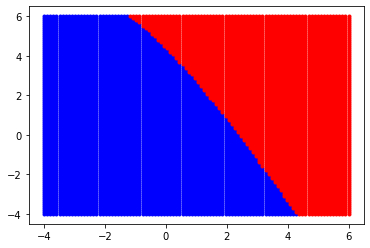

In [ ]:
def model(x_train,x_test):
    x_teste = np.array(x_test).T
    feature0 = x_train[:,0]
    feature1 = x_train[:,1]
    classe = x_train[:,2]

    # cálculo dos vetores com as médias de features 1 e 2
    u_0 = np.array([np.mean(feature0[classe==0]),np.mean(feature1[classe==0])],dtype=float)
    u_1 = np.array([np.mean(feature0[classe==1]),np.mean(feature1[classe==1])],dtype=float)

    # cálculo das matrizes de covariância
    cov_0 = np.cov([feature0[classe==0],feature1[classe==0]])
    cov_1 = np.cov(feature0[classe==1],feature1[classe==1])

    # cálculo dos priors
    p_classe0 = len(feature0[classe==0])/len(feature0)
    p_classe1 = len(feature0[classe==1])/len(feature0)

    # cálculo das likelihoods
    pxtrain_by_classe0 = multivariate_normal.pdf(x_teste,mean=u_0,cov=cov_0)
    pxtrain_by_classe1 = multivariate_normal.pdf(x_teste,mean=u_1,cov=cov_1)

    # cálculo da evidência
    pxtrain = p_classe0*pxtrain_by_classe0+p_classe1*pxtrain_by_classe1

    # cálculos dos posteriors
    pclasse0_by_x = pxtrain_by_classe0*p_classe0/pxtrain
    pclasse1_by_x = pxtrain_by_classe1*p_classe1/pxtrain

    if pclasse0_by_x > pclasse1_by_x:
        return True
    else:
        return False

feature0_train = np.linspace(-4,6,100).reshape(100,1)
feature1_train = np.linspace(-4,6,100).reshape(100,1)

results = np.zeros((100,100))

for i in range(len(feature0_train)):
    for j in range(len(feature1_train)):
        results[i,j] = model(dataset,np.array([feature0_train[i],feature1_train[j]]))

for i in range(100):
    for j in range(100):
        if results[i,j]==1:
            plt.plot(feature0_train[i],feature1_train[j],'b.')
        else:
            plt.plot(feature0_train[i],feature1_train[j],'r.')

**c)** Represente graficamente a fronteira entre as classes, aprendendo um modelo Gaussiano para cada classe com matrizes de covariância partilhadas

**d)** Represente graficamente a fronteira entre as classes, aprendendo o modelo de regressão logística a partir dos dados

**e)** Repetir as alíneas a)-d) para o caso em que $\Sigma_1=\Sigma_0$

## 2

Considere as observações 0.5, 1.8, 3.6 de $C_1$ e 4.5, 5.1, 6.5 de $C_0$.

**a)** Calcule a Negative Log-Likelihood Loss para o modelo de regressão logística, para $\theta_0=4.1$ e $\theta_1=1.5$

In [ ]:
X = np.array([[1,0.5],
              [1,1.8],
              [1,3.6],
              [1,4.5],
              [1,5.1],
              [1,6.5]])

wa = np.array([4.1,1.5])
wb = np.array([4.1,1.5])
wc = np.array([4.1,15])
y = np.array([0,0,0,1,1,1])

def Sigmoide(X,w):
    p = np.dot(w,X.T)
    return 1/(1+np.exp(-p))

def NLL(X,W,Y):
    p = Sigmoide(X,W)
    print(np.log(p))
    return -np.sum(Y*np.log(p)+(1-y)*np.log(1-p))

NLL(X,w,y)

[-7.79789479e-03 -1.11315536e-03 -7.48490286e-05 -1.94044196e-05
 -7.88929371e-06 -9.66098073e-07]


21.1590141589871